In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import time
import sys
import sklearn
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()

print(x_train_all.shape, y_train_all.shape)

# 划分训练集和验证集
x_train, x_valid = x_train_all[:55000], x_train_all[55000:]
y_train, y_valid = y_train_all[:55000], y_train_all[55000:]

(60000, 28, 28) (60000,)


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# 归一化
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1) # 展开

x_valid_scaled = scaler.fit_transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1) # 展开

x_test_scaled = scaler.fit_transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28, 1) # 展开

In [18]:
print("x_train_scaled shape: ", x_train_scaled.shape)

x_train_scaled shape:  (55000, 28, 28, 1)


In [54]:
# 模型2
model = keras.models.Sequential()
# model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.SeparableConv2D(5, (3, 3), strides = 1, padding = "valid", input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPool2D(strides = 1, padding = "same"))
model.add(keras.layers.SeparableConv2D(10, (3, 3), strides = 2, padding = "valid"))
model.add(keras.layers.Flatten(input_shape=[12, 12, 1]))
model.add(keras.layers.Dense(512))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(128))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


# 
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

In [55]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_6 (Separabl (None, 26, 26, 5)         19        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 5)         0         
_________________________________________________________________
separable_conv2d_7 (Separabl (None, 12, 12, 10)        105       
_________________________________________________________________
flatten_10 (Flatten)         (None, 1440)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               737792    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)             

In [56]:
# 回调函数试验
logdir = ".\callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)

output_model_file = os.path.join(logdir, "fashion_mnist_model.h5")

# 回调函数
callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only=True),
#     keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
history = model.fit(x_train_scaled, y_train, epochs=40, 
                    validation_data=(x_valid_scaled, y_valid),
                   callbacks=callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/40
55000/55000 [==============================] - 13s 237us/sample - loss: 0.4561 - accuracy: 0.8360 - val_loss: 0.3454 - val_accuracy: 0.8716
Epoch 2/40
55000/55000 [==============================] - 13s 242us/sample - loss: 0.3250 - accuracy: 0.8801 - val_loss: 0.3067 - val_accuracy: 0.8904
Epoch 3/40
55000/55000 [==============================] - 14s 253us/sample - loss: 0.2740 - accuracy: 0.9004 - val_loss: 0.2832 - val_accuracy: 0.8992
Epoch 4/40
55000/55000 [==============================] - 14s 257us/sample - loss: 0.2323 - accuracy: 0.9132 - val_loss: 0.3262 - val_accuracy: 0.8854
Epoch 5/40
55000/55000 [==============================] - 14s 263us/sample - loss: 0.1992 - accuracy: 0.9254 - val_loss: 0.3096 - val_accuracy: 0.8914
Epoch 6/40
55000/55000 [==============================] - 14s 263us/sample - loss: 0.1707 - accuracy: 0.9355 - val_loss: 0.3099 - val_accuracy: 0.9000
Epoch 7/40
55000/55000 [=====================

In [29]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize = (8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

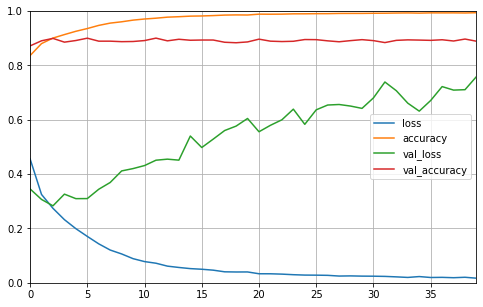

In [57]:
plot_learning_curves(history)

In [62]:
model.evaluate(x_test_scaled, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.7283247885636985, 0.8947]